In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Q3

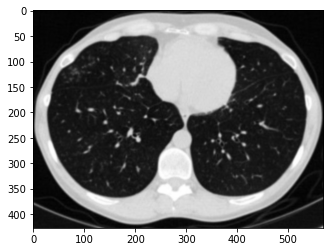

In [3]:
img = cv2.imread('CT.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray', vmin=0, vmax=255)

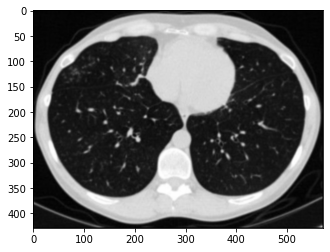

In [5]:
# Fill 0 to image boundary
def fill_img(img):
    row, col = img.shape
    zero = [0] * (col+2)
    img_ = []
    img_.append(zero)
    for i in range(0, row):
        list_i = []
        list_i.append(0)
        for j in range(0, col):
            list_i.append(img[i][j])
        list_i.append(0)
        img_.append(list_i)
    img_.append(zero)
    img_ = np.array(img_)
    return img_

img_ = fill_img(img)
plt.imshow(img_, 'gray', vmin=0, vmax=255)

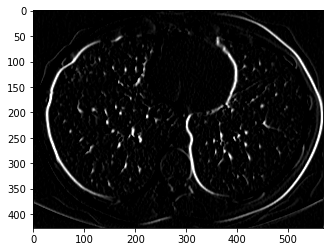

In [9]:
# get sobel grad x
def multiply(img, x, y, S):
    area = []
    for i in range(x-1, x+2):
        tmp = []
        for j in range(y-1, y+2):
            tmp.append(img[i][j])
        area.append(tmp)
    mat = area * S
    sum = 0
    for i in range(0, 3):
        for j in range(0, 3):
            sum += mat[i][j]
    return sum

def calculate_g_x():
    Sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    row, col = img_.shape
    grad_x = []
    for i in range(1, row-1):
        list_i = []
        for j in range(1, col-1):
            list_i.append(multiply(img_, i, j, Sx))
        grad_x.append(list_i)
    grad_x = np.array(grad_x)
    return grad_x

grad_x = calculate_g_x()
plt.imshow(grad_x, 'gray', vmin=0, vmax=255)

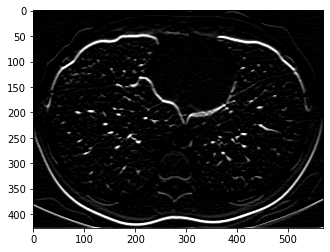

In [11]:
# get sobel grad y
def calculate_g_y():
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    row, col = img_.shape
    grad_y = []
    for i in range(1, row-1):
        list_i = []
        for j in range(1, col-1):
            list_i.append(multiply(img_, i, j, Sy))
        grad_y.append(list_i)
    grad_y = np.array(grad_y)
    return grad_y

grad_y = calculate_g_y()
plt.imshow(grad_y, 'gray', vmin=0, vmax=255)

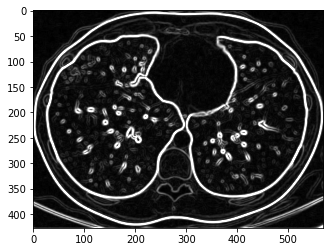

In [14]:
# get final image
def sobel_grad(grad_x, grad_y):
    img = []
    row, col = grad_x.shape
    for i in range(row):
        list_i = []
        for j in range(col):
            list_i.append((grad_x[i][j] ** 2 + grad_y[i][j] ** 2) ** 0.5)
        img.append(list_i)
    img = np.array(img)
    return img

img = sobel_grad(grad_x, grad_y)
plt.imshow(img, 'gray', vmin=0, vmax=255)